In [1]:
import file_manager as fm
import process_pages as pp
from tqdm import tqdm

valid_links=fm.get("data_with_tags")

raw_documents = ["raw_"+fm.clean_up_name(i) for i in valid_links]

import pandas as pd
df = pd.DataFrame()

df["documents"] = [fm.get(i) for i in tqdm(raw_documents)]

df.head()

100%|██████████| 3053/3053 [00:01<00:00, 2617.36it/s]


,documents
0,Hey friends 👋 I want to start off by saying t...
1,JavaScript is an important part of the web de...
2,This tutorial will be an introduction to the ...
3,"With the new semester just around the corner,..."
4,So basically if we try to concatenate string(...


In [2]:
#remove special characters
df['clean_documents'] = df['documents'].str.replace("[^a-zA-Z#]", " ")
df.head()

C:\Users\kadir\AppData\Local\Temp/ipykernel_20024/355259177.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_documents'] = df['documents'].str.replace("[^a-zA-Z#]", " ")


,documents,clean_documents
0,Hey friends 👋 I want to start off by saying t...,Hey friends I want to start off by saying t...
1,JavaScript is an important part of the web de...,JavaScript is an important part of the web de...
2,This tutorial will be an introduction to the ...,This tutorial will be an introduction to the ...
3,"With the new semester just around the corner,...",With the new semester just around the corner ...
4,So basically if we try to concatenate string(...,So basically if we try to concatenate string ...


In [3]:
#lowercase all characters
df['clean_documents'] = df['clean_documents'].fillna('').apply(lambda x: x.lower())
df.head()

,documents,clean_documents
0,Hey friends 👋 I want to start off by saying t...,hey friends i want to start off by saying t...
1,JavaScript is an important part of the web de...,javascript is an important part of the web de...
2,This tutorial will be an introduction to the ...,this tutorial will be an introduction to the ...
3,"With the new semester just around the corner,...",with the new semester just around the corner ...
4,So basically if we try to concatenate string(...,so basically if we try to concatenate string ...


In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# tokenization
tokenized_doc = df['clean_documents'].fillna('').apply(lambda x: x.split())
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# de-tokenization
detokenized_doc = []

for i in range(len(df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
df['clean_documents'] = detokenized_doc
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kadir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,documents,clean_documents
0,Hey friends 👋 I want to start off by saying t...,hey friends want start saying measure even opt...
1,JavaScript is an important part of the web de...,javascript important part web development ecos...
2,This tutorial will be an introduction to the ...,tutorial introduction concept webhooks also bu...
3,"With the new semester just around the corner,...",new semester around corner thought would perfe...
4,So basically if we try to concatenate string(...,basically try concatenate string empty string ...


In [5]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")

import re

nltk.download('stopwords', quiet=True, raise_on_error=True)

stopwords = stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def lemmatize_and_stem(text):

    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    filtered_tokens = [lemmatizer.lemmatize(t) for t in filtered_tokens if t not in stopwords]
    stems = [stemmer.stem(t) for t in filtered_tokens if t not in stopwords and len(t) > 1]

    return stems

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=True,tokenizer=lemmatize_and_stem)

train = vectorizer.fit_transform(df['clean_documents'])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kadir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
dictionary = vectorizer.get_feature_names_out()
dictionary[:100]

array(['aa', 'aaa', 'aaaa', 'aab', 'aad', 'aadhar', 'aaeeertttt', 'aarch',
       'ab', 'aba', 'abac', 'abacu', 'abaixo', 'abandon', 'abat',
       'abayomi', 'abb', 'abbey', 'abbr', 'abbrevi', 'abc', 'abcd',
       'abcdefgabc', 'abd', 'abdul', 'abdulkad', 'abdullah', 'aberdeen',
       'aberta', 'aberto', 'abhinav', 'abhiraj', 'abhishek', 'abi',
       'abid', 'abidoy', 'abierto', 'abil', 'abl', 'abnorm', 'abomin',
       'abonn', 'abonnez', 'abordagem', 'abort', 'abou', 'abour', 'abp',
       'abra', 'abraham', 'abramov', 'abreact', 'abren', 'abridg',
       'abrir', 'abrirlo', 'abroad', 'abrupt', 'abruptli', 'absenc',
       'absent', 'absolut', 'absorb', 'abstract',
       'abstractfactorypattern', 'abstractmongoconfigur', 'abstrai',
       'absurd', 'abuja', 'abund', 'abundantli', 'abus', 'abusiva',
       'abyss', 'ac', 'aca', 'acaba', 'acabei', 'acabo', 'academ',
       'academi', 'academind', 'acc', 'acccess', 'acced', 'accedido',
       'accel', 'acceler', 'accentur', 'accept

In [7]:
print(len(dictionary))

15918


In [ ]:
#######################################################################################################################################

In [ ]:
# RUN THIS LINE AND BELOW COMMENTED LINES TO USE LSA AS TOPIC-CANDIDATE COLUMNS GENERATOR

#   from sklearn.decomposition import TruncatedSVD
#   # SVD represent documents and terms in vectors
#   # Reduce the dimension of vectors to number or candidate topics
#   svd_model = TruncatedSVD(n_components=9, algorithm='randomized', n_iter=100, random_state=122)
#   lsa = svd_model.fit_transform(train)

In [ ]:
#   pd.options.display.float_format = '{:,.4f}'.format
#   topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9"])
#   topic_encoded_df["documents"] = df['clean_documents']
#   display(topic_encoded_df[["documents", "topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9"]])

In [ ]:
#   topic_encoded_df["documents"][0]

In [11]:
#   # the number of documents by their first tags
#   tags_with_urls=fm.get("tags_with_urls")
#   print(len(tags_with_urls["nodejs"]))

243


In [ ]:
#   # document with tags at i.th index at all_urls
#   lis = list(valid_links)
#   a=lis[1768]
#   print(a,"\n")
#   valid_links[a]

In [ ]:
#   encoding_matrix = pd.DataFrame(svd_model.components_, columns = (dictionary)).T
#   encoding_matrix

In [ ]:

#   lis = list(valid_links.keys())
#   
#   tag_count_dict={}
#   
#   topic_encoded_df = topic_encoded_df.sort_values(ascending=False,by="topic_6")
#   for i in range(400):
#       url_index = topic_encoded_df["topic_6"].index[i]
#   
#   
#   #    # get total count of tags for first N document
#   #    # print(lis[url_index])
#   #    for j in valid_links[lis[url_index]]:
#   #        # print(j)
#   #        if tag_count_dict.get(j) is not None:
#   #            tag_count_dict[j] = tag_count_dict[j]+1
#   #        else:
#   #            tag_count_dict[j]=1
#   
#       # get counts of first tags for first N document
#       first_key = valid_links[lis[url_index]][0]
#       # print(first_key)
#       if tag_count_dict.get(first_key) is not None:
#           tag_count_dict[first_key] = tag_count_dict[first_key]+1
#       else:
#           tag_count_dict[first_key]=1
#   
#   
#   mx = max(tag_count_dict.values())
#   
#   sorted_dict = dict(sorted(tag_count_dict.items(),
#                              key=lambda item: item[1],
#                              reverse=True))
#   
#   for i in list(sorted_dict)[:20]:
#       print(i,sorted_dict[i])
#   print("\n")
#   
#   for i in range(20):
#       url_index = topic_encoded_df["topic_6"].index[i]
#       print(lis[url_index])

In [190]:
#   clusters=pd.DataFrame(columns=topic_encoded_df.columns[:9])

In [228]:
#   #map the documents to their most probable columns
#   topic_encoded_df = topic_encoded_df.sort_index(ascending=True,axis=0)
#   topic_encoded_df2=pd.DataFrame(columns=topic_encoded_df.columns[:9],data=topic_encoded_df.iloc[0:,:9])
#   
#   cluster_dict={
#       "topic_1":[],
#       "topic_2":[],
#       "topic_3":[],
#       "topic_4":[],
#       "topic_5":[],
#       "topic_6":[],
#       "topic_7":[],
#       "topic_8":[],
#       "topic_9":[]
#   }
#   
#   for i in range(3053):
#       maxValueIndexObj = topic_encoded_df2.iloc[i,:].idxmax(axis=0)
#       cluster_dict[maxValueIndexObj].append(lis[i])


In [ ]:
#   # number of documents in topic-candidate columns
#   for i in cluster_dict:
#       print(i,len(cluster_dict[i]))

In [ ]:
#   # documents in topic-candidate column
#   cluster_dict["topic_6"]

In [ ]:
######################################################################################################################################

In [8]:
# Apply LSA on train data
from sklearn.decomposition import TruncatedSVD
# SVD represent documents and terms in vectors
# Reduce the dimension of vectors to doc_count*500
svd_model = TruncatedSVD(n_components=500, algorithm='randomized', n_iter=100, random_state=122)
lsa = svd_model.fit_transform(train)

In [9]:
pd.options.display.float_format = '{:,.4f}'.format
lsa_applied_df = pd.DataFrame(lsa)
lsa_applied_df["documents"] = df['clean_documents']
lsa_applied_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,documents
0,0.3025,0.0018,-0.0396,0.0995,-0.1291,-0.0983,0.0958,0.0940,-0.0005,-0.1228,...,0.0077,0.0031,0.0115,-0.0054,0.0097,-0.0186,-0.0166,-0.0089,-0.0001,hey friends want start saying measure even opt...
1,0.3081,-0.0412,0.0176,0.1228,-0.0200,-0.1175,0.0719,0.1414,0.0049,-0.0988,...,0.0066,-0.0276,-0.0119,-0.0030,-0.0056,0.0016,0.0109,-0.0202,0.0026,javascript important part web development ecos...
2,0.2466,0.0788,-0.0937,0.0612,-0.1684,-0.1075,0.1434,0.0340,0.1477,0.0016,...,0.0176,-0.0468,0.0147,-0.0154,-0.0104,-0.0378,-0.0010,0.0209,-0.0195,tutorial introduction concept webhooks also bu...
3,0.2251,-0.0821,0.1122,-0.0618,0.0016,0.0160,-0.0369,0.0484,0.0319,-0.0515,...,-0.0210,-0.0012,0.0028,0.0415,-0.0058,0.0084,0.0182,0.0079,-0.0219,new semester around corner thought would perfe...
4,0.1598,-0.1640,-0.1570,-0.2582,0.1219,-0.2066,-0.0935,0.2786,-0.2032,0.0945,...,0.0072,0.0111,0.0130,-0.0048,-0.0008,-0.0080,-0.0207,0.0040,-0.0178,basically try concatenate string empty string ...


100%|██████████| 19/19 [00:30<00:00,  1.60s/it]


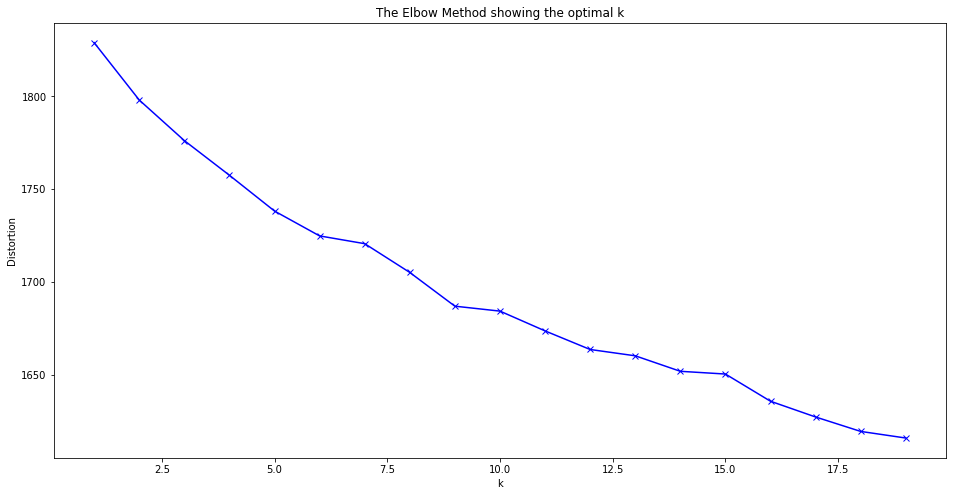

In [10]:
# Use the elbow method to determine the proper number of clusters 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from tqdm import tqdm

distortions = []
K = range(1,20)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(lsa)
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
train=lsa

In [61]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster._kmeans import KMeans
from tqdm import tqdm

clusters = 17
out = KMeans(n_clusters=clusters, random_state=0).fit(train)


features = len(vectorizer.get_feature_names_out())
#tests = np.reshape(test.toarray(), (-1, features))
predictions = out.predict(train)

for cluster in tqdm(range(clusters)):
	print("Trained: ", list(out.labels_).count(cluster), " - ", "Predicted: ", list(predictions).count(cluster))

100%|██████████| 17/17 [00:00<00:00, 183.28it/s]

Trained:  109  -  Predicted:  109
Trained:  110  -  Predicted:  110
Trained:  110  -  Predicted:  110
Trained:  41  -  Predicted:  41
Trained:  271  -  Predicted:  271
Trained:  174  -  Predicted:  174
Trained:  324  -  Predicted:  324
Trained:  263  -  Predicted:  263
Trained:  47  -  Predicted:  47
Trained:  121  -  Predicted:  121
Trained:  872  -  Predicted:  872
Trained:  32  -  Predicted:  32
Trained:  43  -  Predicted:  43
Trained:  378  -  Predicted:  378
Trained:  9  -  Predicted:  9
Trained:  21  -  Predicted:  21
Trained:  128  -  Predicted:  128


In [ ]:
clusters_with_docs={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[],
    10:[],
    11:[],
    12:[],
    13:[],
    14:[],
    15:[],
    16:[]
}

for i in range(len(predictions)):
    #print(i," ",predictions[i])
    clusters_with_docs[predictions[i]].append(list(valid_links)[i])

# for i in clusters_with_docs[0]:
#     print(fm.clean_up_name(i))


In [ ]:
for i in clusters_with_docs[3]:
    print(valid_links[i])

In [84]:
# View most used first tags of documents of a cluster
lis = list(valid_links.keys())

tag_count_dict={}

cluster_key=16

for i in clusters_with_docs[cluster_key]:
#       print(fm.clean_up_name(i))

#    # get total count of tags for first N document
#    for j in valid_links[i]:
#        # print(j)
#        if tag_count_dict.get(j) is not None:
#            tag_count_dict[j] = tag_count_dict[j]+1
#        else:
#            tag_count_dict[j]=1


    # get counts of first tags for first N document
    first_key = valid_links[i][0]
    # print(first_key)
    if tag_count_dict.get(first_key) is not None:
        tag_count_dict[first_key] = tag_count_dict[first_key]+1
    else:
        tag_count_dict[first_key]=1


mx = max(tag_count_dict.values())

sorted_dict = dict(sorted(tag_count_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

for i in list(sorted_dict)[:10]:
    print(i,sorted_dict[i])
print("\n")

for i in clusters_with_docs[cluster_key][:40]:
    print(" ".join(fm.clean_up_name(i).split('hashnode_dev')[-1].split('_')))

java 21
python 17
coding 6
machine-learning 5
python-beginner 4
cpp 4
beginners 3
programming-blogs 3
programming-tips 3
javascript 3


 python pitfalls chapter classes
 what is machine learning and types of ml algorithms
 python flask tutorial activities and their purpose and setup
  best way to start learning python a complete roadmap
 game programming fundamentals
 why python is best language for data science
 journey from java to javascript part1
 introduction to python programming beginners guide
 python the beginners guide
 making decisions in python
 choose the best sql adapter for your python project
 the ultimate beginners guide to python
 backend jungle install and prep python edition
 machine learning python
 getting started with java programming
 programming the necessity
 python vs javascript what are the key differences between the two popular programming languages
 how to write better code
 setting up your working environment
 pyintro
 what is javascript
 custom commands

In [ ]:
#   TO-DO

#   handle non-english documents
#   sort documents of cluster by cosine dist to the centroids (sklearn)
#   use pca to visualize the samples in 2 dimension
#   generate scatter-plot for the clusters